In [22]:
#We can create simple molecules by manually typing the chemical symbols and a guess for the atomic positions in Ångström. For example N2:
from ase import Atoms
atoms = Atoms('N2', positions=[[0, 0, 0], [0, 0, 1.1]],cell=[10, 10, 10])
atoms.positions

array([[0. , 0. , 0. ],
       [0. , 0. , 1.1]])

In [18]:
from ase.visualize import view
view(atoms)

<Popen: returncode: None args: ['/usr/bin/python3', '-m', 'ase', 'gui', '-']>

In [3]:
#Equivalently we can save the atoms in some format, often ASE’s own trajectory format:
from ase.io import write
write('myatoms.traj', atoms)
atoms.positions

array([[0. , 0. , 0. ],
       [0. , 0. , 1.1]])

ASE uses calculators to perform calculations. Calculators are abstract interfaces to different backends which do the actual computation. Normally, calculators work by calling an external electronic structure code or force field code. To run a calculation, we must first create a calculator and then attach it to the Atoms object. Here we use GPAW and set a few calculation parameters as well:

In [4]:
atoms.center(vacuum=3.0)
print(atoms)
atoms.positions

Atoms(symbols='N2', pbc=False, cell=[6.0, 6.0, 7.1])


array([[3. , 3. , 3. ],
       [3. , 3. , 4.1]])

In [5]:
from gpaw import GPAW

calc = GPAW(mode='lcao', basis='dzp', txt='gpaw.txt', xc='LDA')
atoms.calc = calc

Different electronic structure codes have different input parameters. GPAW can use real-space grids (mode='fd'), planewaves (mode='pw'), or localized atomic orbitals (mode='lcao') to represent the wavefunctions. Here we have asked for the faster but less accurate LCAO mode, together with the standard double-zeta polarized basis set ('dzp'). GPAW and many other codes require a unit cell (or simulation box) as well. Hence we center the atoms within a box, leaving 3 Å of empty space around each atom:

In [6]:
view(atoms)

<Popen: returncode: None args: ['/usr/bin/python3', '-m', 'ase', 'gui', '-']>

In [7]:
#Once the Atoms have a calculator with appropriate parameters, we can do things like calculating energies and forces:
e = atoms.get_potential_energy()
print('Energy', e)
f = atoms.get_forces()
print('Forces')
print(f)
#This will give us the energy in eV and the forces in eV/Å. 

Energy -15.753172434947512
Forces
[[ 1.52118219e-29 -5.07060730e-30 -3.08959522e+00]
 [-2.02824292e-29  0.00000000e+00  3.08959522e+00]]


In [8]:
print(atoms.positions)

[[3.  3.  3. ]
 [3.  3.  4.1]]


In [9]:
#atoms.positions = [[2, 2, 2],[2, 2, 2.74]]
e = atoms.get_potential_energy()
print('Energy', e)

Energy -15.753172434947512


In [11]:
from ase import Atoms
from gpaw import GPAW

# Create an H2 molecule in a cubic unit cell with a side length of 10 Å
atoms1 = Atoms('H2', positions=[[0, 0, 0], [0, 0, 0.74]], cell=[10, 10, 10], pbc=True)

# Set up the GPAW calculator
calc = GPAW(mode='lcao', basis='dzp')
atoms1.calc = calc

# Perform the first calculation (initial positions)
initial_energy = atoms1.get_potential_energy()
initial_forces = atoms1.get_forces()

print("Initial positions:")
print(atoms1.positions)
print("Initial potential energy:", initial_energy)
print("Initial forces:")
print(initial_forces)

# Move the second atom
atoms1.positions[1] = [0, 0, 1.0]  # Change the position of the second atom

# Perform the second calculation (after moving the atom)
new_energy = atoms1.get_potential_energy()
new_forces = atoms1.get_forces()

print("\nNew positions:")
print(atoms1.positions)
print("New potential energy:", new_energy)
print("New forces:")
print(new_forces)



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.6.0
 |___|_|             

User:   ram@dasari-ram
Date:   Wed Jul  3 08:17:07 2024
Arch:   x86_64
Pid:    2456
CWD:    /home/ram/Desktop/ASE
Python: 3.10.12
gpaw:   /home/ram/.local/lib/python3.10/site-packages/gpaw
_gpaw:  /home/ram/.local/lib/python3.10/site-packages/
        _gpaw.cpython-310-x86_64-linux-gnu.so
ase:    /home/ram/.local/lib/python3.10/site-packages/ase (version 3.23.0)
numpy:  /home/ram/.local/lib/python3.10/site-packages/numpy (version 1.26.3)
scipy:  /home/ram/.local/lib/python3.10/site-packages/scipy (version 1.12.0)
libxc:  5.1.7
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  basis: dzp
  mode: lcao

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
  H:
    name: Hydrogen
    id: 4766778ce56282eaa64abeb28b7c1de3
    Z: 1.0
    valence: 1
    core: 0
    charge: 0.0
    file: 

In [12]:
from ase.io.trajectory import Trajectory
traj = Trajectory('mytrajectory.traj', 'w')
traj.write(atoms1)

In [23]:
from ase.io import read

# Read the trajectory file
atoms2 = read('mytrajectory.traj')

# Print the atomic positions
print("Positions:")
print(atoms2.positions)

Positions:
[[0. 0. 0.]
 [0. 0. 1.]]


In [32]:
from ase.io import iread
for atoms in iread('mytrajectory.traj'):
    print(atoms)

Atoms(symbols='H2', pbc=True, cell=[10.0, 10.0, 10.0], calculator=SinglePointCalculator(...))


ase.io.read() reads and returns the last image, or possibly a list of images if the index keyword is also specified.

ase.io.iread() reads multiple images, one at a time.

Distance: 0.60 A, Energy: 63.68000 eV
Distance: 0.65 A, Energy: 38.43805 eV
Distance: 0.71 A, Energy: 20.45960 eV
Distance: 0.76 A, Energy: 7.84734 eV
Distance: 0.81 A, Energy: -0.97019 eV
Distance: 0.86 A, Energy: -6.94325 eV
Distance: 0.92 A, Energy: -10.91333 eV
Distance: 0.97 A, Energy: -13.43792 eV
Distance: 1.02 A, Energy: -14.90775 eV
Distance: 1.07 A, Energy: -15.61488 eV
Distance: 1.13 A, Energy: -15.77795 eV
Distance: 1.18 A, Energy: -15.56559 eV
Distance: 1.23 A, Energy: -15.10724 eV
Distance: 1.28 A, Energy: -14.49344 eV
Distance: 1.34 A, Energy: -13.77883 eV
Distance: 1.39 A, Energy: -13.00602 eV
Distance: 1.44 A, Energy: -12.20349 eV
Distance: 1.49 A, Energy: -11.39434 eV
Distance: 1.55 A, Energy: -10.59190 eV
Distance: 1.60 A, Energy: -9.90325 eV


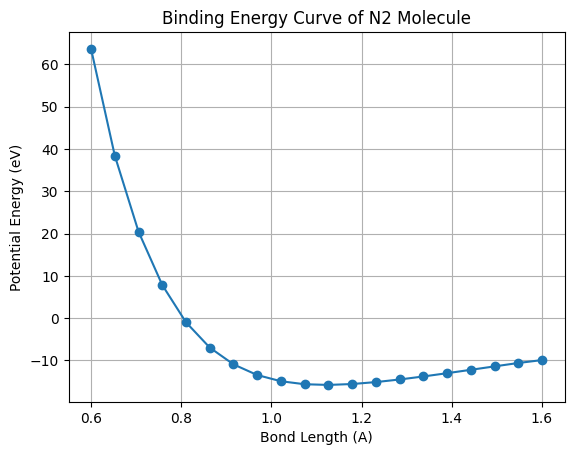

In [30]:
import numpy as np
from ase import Atoms
from gpaw import GPAW
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt

# Create an N2 molecule with an initial guess for bond length
initial_distance = 1.1  # in angstroms
steps = 20
displacement_range = 0.5  # displacement range in angstroms (total range will be from -displacement_range to +displacement_range)
displacements = np.linspace(-displacement_range, displacement_range, steps)

# Create a trajectory file to save each step
traj = Trajectory('binding_energy_curve.traj', 'w')

# List to store distances and energies
distances = []
energies = []

# Loop over displacements
for disp in displacements:
    # Create N2 molecule with the current displacement
    distance = initial_distance + disp
    atoms3 = Atoms('N2', positions=[[0, 0, 0], [0, 0, distance]])
    atoms3.center(vacuum=3.0)
    
    # Set up the GPAW calculator
    calc = GPAW(mode='lcao', basis='dzp', xc='LDA', txt=None)
    atoms3.calc = calc
    
    # Calculate potential energy
    energy = atoms3.get_potential_energy()
    print(f'Distance: {distance:.2f} A, Energy: {energy:.5f} eV')
    
    # Save current atoms to trajectory
    traj.write(atoms3)
    
    # Store distance and energy
    distances.append(distance)
    energies.append(energy)

# Close the trajectory file
traj.close()

# Plot the binding energy curve
plt.figure()
plt.plot(distances, energies, marker='o')
plt.xlabel('Bond Length (A)')
plt.ylabel('Potential Energy (eV)')
plt.title('Binding Energy Curve of N2 Molecule')
plt.grid()
plt.show()


The term "binding energy curve" refers to a plot of the potential energy of a molecule (or system) as a function of the distance between its constituent atoms. 
The binding energy curve illustrates how the potential energy of the system varies with the distance between the atoms. This helps in understanding the stability and strength of the bond between the atoms.
By plotting this curve, you can visualize the point where the system is at its lowest energy, which corresponds to the equilibrium bond length.

In this system the equilibrium distance is around 1.13 A(Angstrom).

Ask sir about binding energy and molecular atomization energy?